### import modules

In [93]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
import sys
sys.path.append('../../advanced_ml')
from ml_from_scratch.neighbors import KNeighborsClassifier as ScratchKNClassifier

### load data

In [95]:
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)

### simple model

In [96]:
clf = ScratchKNClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

num_correct_pred = (y_pred == y_test).sum()
accuracy = (num_correct_pred / y_test.shape[0]) * 100

In [97]:
print('model accuracy: %.2f%%' % accuracy)

model accuracy: 89.47%


### experiment dengan mengubah hyperparameter k

In [98]:
ks = [3, 5, 7, 9]
k_accurations = []

for k in ks:
    clf = ScratchKNClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    num_correct_pred = (y_pred == y_test).sum()
    accuracy = (num_correct_pred / y_test.shape[0]) * 100

    k_accurations.append(accuracy)

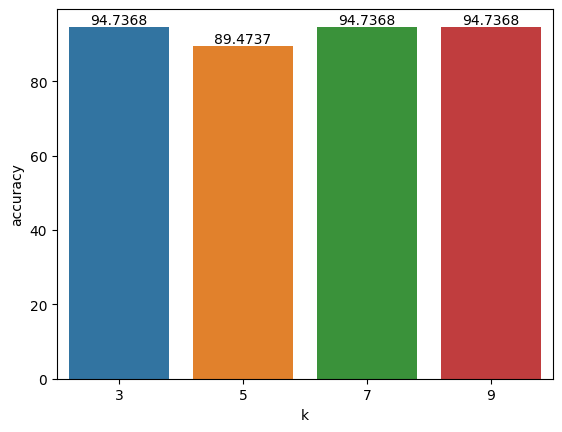

In [99]:
ax = sns.barplot(x=ks, y=k_accurations)
ax.set(xlabel='k', ylabel='accuracy')
ax.bar_label(ax.containers[0])
plt.show()

### experiment dengan mengubah hyperparameter p

In [100]:
ps = [1, 2]
p_accurations = []

for p in ps:
    clf = ScratchKNClassifier(p=p)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    num_correct_pred = (y_pred == y_test).sum()
    accuracy = (num_correct_pred / y_test.shape[0]) * 100

    p_accurations.append(accuracy)

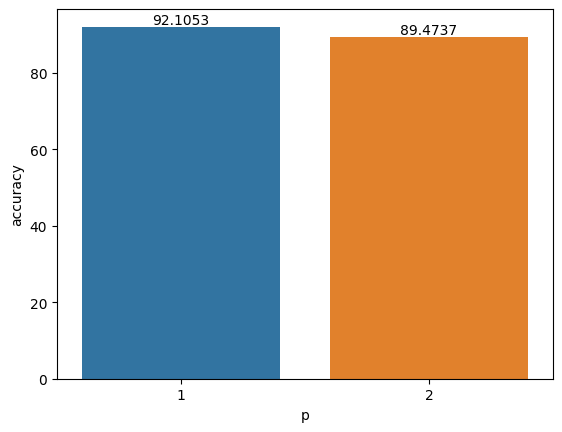

In [101]:
ax = sns.barplot(x=ps, y=p_accurations)
ax.set(xlabel='p', ylabel='accuracy')
ax.bar_label(ax.containers[0])
plt.show()

### experiment dengan mengubah hyperparameter weight

In [102]:
ws = ['uniform', 'distance']
w_accurations = []

for w in ws:
    clf = ScratchKNClassifier(weights=w)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    num_correct_pred = (y_pred == y_test).sum()
    accuracy = (num_correct_pred / y_test.shape[0]) * 100

    w_accurations.append(accuracy)

/Users/zain/python/pacmann/advanced_ml/notebook/../../advanced_ml/ml_from_scratch/neighbors/_base.py:118: RuntimeWarning: divide by zero encountered in divide
  weights_arr = np.where(dist==0, 0, 1/(dist**2))


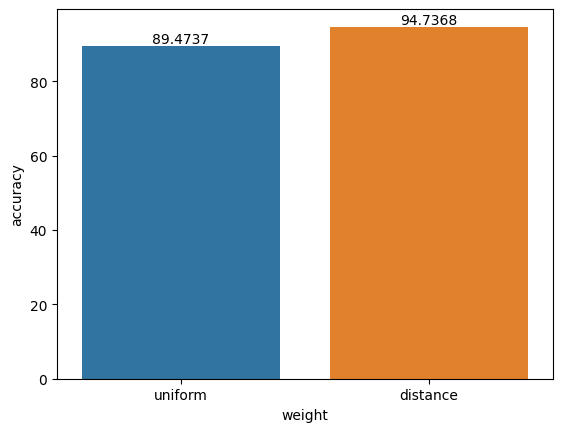

In [103]:
ax = sns.barplot(x=ws, y=w_accurations)
ax.set(xlabel='weight', ylabel='accuracy')
ax.bar_label(ax.containers[0])
plt.show()

### membandingkan dengan library sklearn

In [104]:
sklearn_model = KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')
sklearn_model.fit(X_train, y_train)
sklearn_pred = sklearn_model.predict(X_test)

In [105]:
sklearn_num_correct_pred = (sklearn_pred == y_test).sum()
sklearn_accuracy = (sklearn_num_correct_pred / y_test.shape[0]) * 100

### predict menggunakan scratch model

In [106]:
scratch_model = ScratchKNClassifier(n_neighbors=3, p=1, weights='distance')
scratch_model.fit(X_train, y_train)
scratch_pred = scratch_model.predict(X_test)

/Users/zain/python/pacmann/advanced_ml/notebook/../../advanced_ml/ml_from_scratch/neighbors/_base.py:118: RuntimeWarning: divide by zero encountered in divide
  weights_arr = np.where(dist==0, 0, 1/(dist**2))


In [107]:
scratch_num_correct_predictions = (scratch_pred == y_test).sum()
scratch_accuracy = (scratch_num_correct_predictions / y_test.shape[0]) * 100

### bandingkan hasil

In [108]:
print('sklearn model accuracy: %.2f%%' % sklearn_accuracy)
print('scratch model accuracy: %.2f%%' % scratch_accuracy)

sklearn model accuracy: 97.37%
scratch model accuracy: 97.37%
